In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import healpy as hp
from pathlib import Path
import xarray as xr
import easygems.healpix as egh
import pandas as pd

In [3]:
# Define the path to the Zarr dataset
# Open the Zarr store using xarray

zoom_levels = [3,4,5,6,7,8,9,10]
temp_res = 1

# UK MODEL ################################
zoom = 3; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_3 = xr.open_zarr(path)

zoom = 4; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_4 = xr.open_zarr(path)

zoom = 5; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_5 = xr.open_zarr(path)

zoom = 6; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_6 = xr.open_zarr(path)

zoom = 7; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_7 = xr.open_zarr(path)

zoom = 8; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_8 = xr.open_zarr(path)

zoom = 9; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_9 = xr.open_zarr(path)

zoom = 10; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_10 = xr.open_zarr(path)


# GERMAN MODEL ################################


zoom = 10; path = '/g/data/qx55/germany_node/d3hp003.zarr/PT1H_point_z%i_atm.zarr' % zoom
ds_10_g = xr.open_zarr(path)



In [4]:
# Get domain for Fiji 

# Create lat / lon arrays
lat = []
lon = []
#Suva (Manual)
lat_station = -18.147571
lon_station = 178.453610
lat.append(lat_station)
lon.append(lon_station)
#Suva (AWS)
lat_station = -18.147549
lon_station = 178.453608
lat.append(lat_station)
lon.append(lon_station)
#Lautoka (Manual)
lat_station = -17.618600
lon_station = 177.438900
lat.append(lat_station)
lon.append(lon_station)
#Lautoka (TB3)
lat_station = -17.618897
lon_station = 177.438730
lat.append(lat_station)
lon.append(lon_station)
#Penang (TB3)
lat_station = -17.373833
lon_station = 178.171619
lat.append(lat_station)
lon.append(lon_station)
#Savusavu (Airport)
lat_station = -16.806141
lon_station = 179.342817
lat.append(lat_station)
lon.append(lon_station)
#Labasa (Airport)
lat_station = -16.468900
lon_station = 179.339700
lat.append(lat_station)
lon.append(lon_station)

# Get boundary of points

margin = 0.1 # optional margin for the boundary

print([min(lon), max(lon), min(lat), max(lat)])
lon_min = min(lon)-margin
lon_max = max(lon)+margin
lat_min = min(lat)-margin
lat_max = max(lat)+margin
bounds = [lon_min, lon_max, lat_min, lat_max]
print(bounds)


# Manually add bounds
lon_min = 177
lon_max = 180
lat_min = -18.5
lat_max = -16


[177.43873, 179.342817, -18.147571, -16.4689]
[177.33873, 179.442817, -18.247571, -16.3689]


In [5]:
import imageio
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [6]:
# Subset to our time range of interest
start_date = "2020-03-01"
finish_date = "2021-02-28"

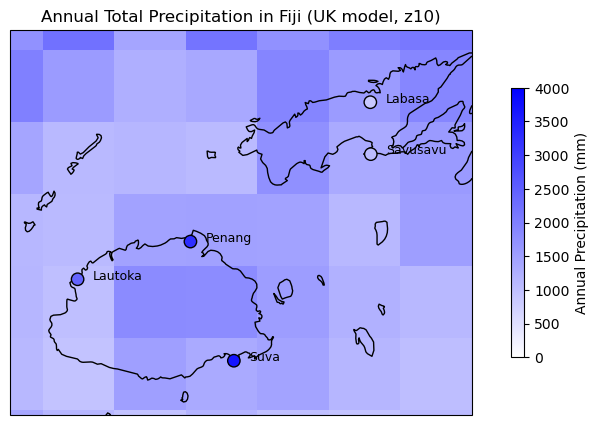

In [17]:
# UK Model ########################################################
# Get the total annual precipitation spatial map
pr_10 = ds_10.pr * 60*60 # kg m-2 s-1 to mm / hr, not subsetted
time_10_global = pr_10.sel(time=slice(start_date, finish_date))
annual_total = time_10_global.sum(dim='time')


# Define the min and max values for the colorbar
vmin = 0 # 800
vmax = 4000 #3750

# Start a new figure with Cartopy projection
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': projection})

# Plot the scatter on top of the basemap
colours = [(1, 1, 1), (0, 0, 1)]  # White to blue
cmap_name = 'white_blue'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colours, N=256)
ax.set_global()
im = egh.healpix_show(annual_total.values, ax=ax, cmap=custom_cmap, vmin=vmin, vmax=vmax)
ax.coastlines()

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label("Annual Precipitation (mm)")


# Fiji rainfall data
locations = ['Labasa', 'Lautoka', 'Penang', 'Savusavu', 'Suva']
lats = [-16.468900, -17.618600, -17.373833, -16.806141, -18.147571]
lons = [179.339700, 177.438900, 178.171619, 179.342817, 178.453610]
rainfall = [861.4, 2430.7, 3266.0, 1072.3, 3676.6]

# Plot the points
scatter = ax.scatter(
    lons,
    lats,
    c=rainfall,
    cmap=im.get_cmap(),
    vmin=vmin,
    vmax=vmax,
    s=80,
    edgecolor='black',
    transform=ccrs.PlateCarree(),
    zorder=10
)

for loc, lon, lat in zip(locations, lons, lats):
    ax.text(lon + 0.1, lat, loc, transform=ccrs.PlateCarree(), fontsize=9, zorder=11)


plt.title("Annual Total Precipitation in Fiji (UK model, z10)")
fname = f"hk25-AusNode-ExtremePrecipitation/Plots/Fiji_annual_precip_z10.png"
plt.savefig(fname, dpi=150, bbox_inches='tight')
plt.show()



Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1461f24e30a0>>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1461f24e30a0>>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


KeyboardInterrupt: 

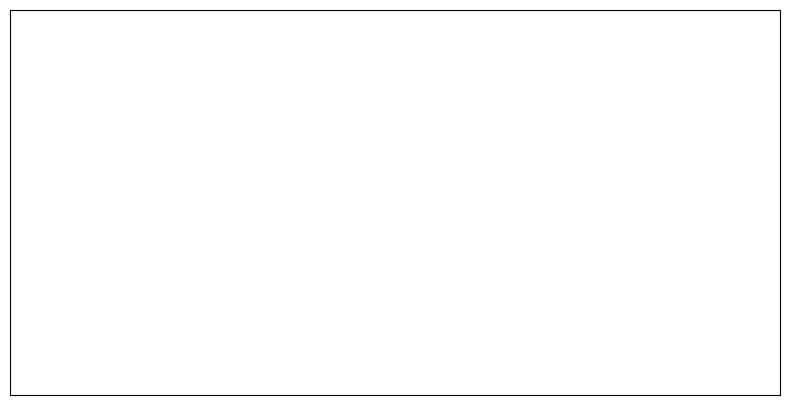

In [8]:
# Germany Model ########################################################
# Get the total annual precipitation spatial map
pr_10 = ds_10_g.pr * 60*60 # kg m-2 s-1 to mm / hr, not subsetted
time_10_global = pr_10.sel(time=slice(start_date, finish_date))
annual_total = time_10_global.sum(dim='time')


# Define the min and max values for the colorbar
vmin = 0 #800
vmax = 6000

# Start a new figure with Cartopy projection
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': projection})

# Plot the scatter on top of the basemap
colours = [(1, 1, 1), (0, 0, 1)]  # White to blue
cmap_name = 'white_blue'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colours, N=256)
ax.set_global()
im = egh.healpix_show(annual_total.values, ax=ax, cmap=custom_cmap, vmin=vmin, vmax=vmax)
ax.coastlines()

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label("Annual Precipitation (mm)")


# Fiji rainfall data
locations = ['Labasa', 'Lautoka', 'Penang', 'Savusavu', 'Suva']
lats = [-16.468900, -17.618600, -17.373833, -16.806141, -18.147571]
lons = [179.339700, 177.438900, 178.171619, 179.342817, 178.453610]
rainfall = [861.4, 2430.7, 3266.0, 1072.3, 3676.6]

# Plot the points
scatter = ax.scatter(
    lons,
    lats,
    c=rainfall,
    cmap=im.get_cmap(),
    vmin=vmin,
    vmax=vmax,
    s=80,
    edgecolor='black',
    transform=ccrs.PlateCarree(),
    zorder=10
)

for loc, lon, lat in zip(locations, lons, lats):
    ax.text(lon + 0.1, lat, loc, transform=ccrs.PlateCarree(), fontsize=9, zorder=11)


plt.title("Annual Total Precipitation in Fiji (German model, z10)")
fname = f"hk25-AusNode-ExtremePrecipitation/Plots/Fiji_annual_precip_z10_German.png"
plt.savefig(fname, dpi=150, bbox_inches='tight')
plt.show()



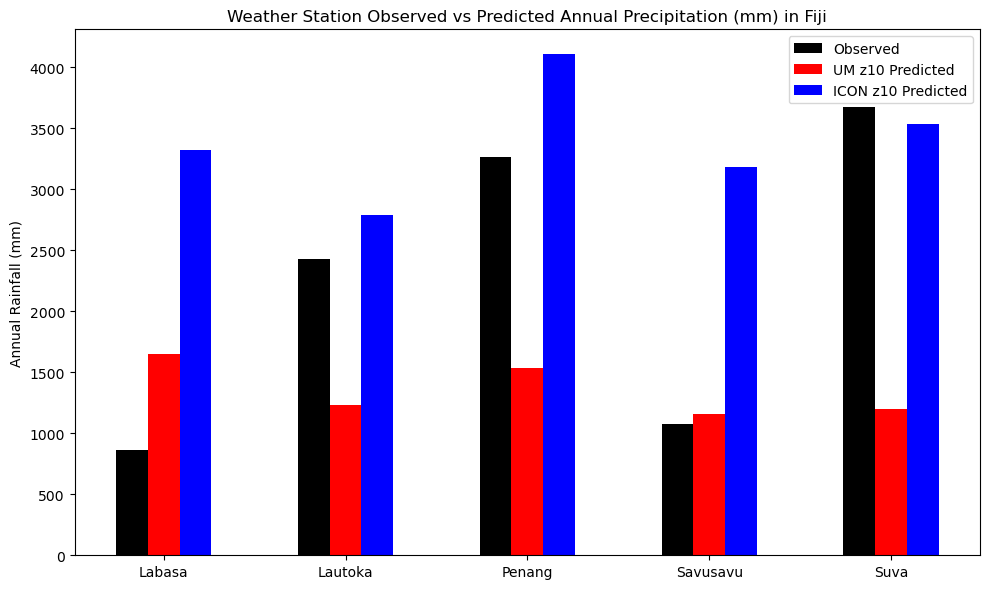

In [90]:
# Plot difference in annual precip

base_obs_path = "~/hk25-AusNode-ExtremePrecipitation/Data/Processed/Fiji"
stations = {
    "suva_man": "Suva (Manual)",
    "suva_aws": "Suva (Automatic)",
    "lautoka_man": "Lautoka (Manual)",
    "lautoka_tb3": "Lautoka (TB3)",
    "penang_tb3": "Penang (TB3)",
    "savusavu_airport": "Savusavu (Airport)"
}
base_model_path = "~/hk25-AusNode-ExtremePrecipitation/Data/Model_Daily/Fiji"

locations = ['Labasa', 'Lautoka', 'Penang', 'Savusavu', 'Suva']
rainfall = [861.4, 2430.7, 3266.0, 1072.3, 3676.6]

# Get model predicted annual precip
predicted_u = []
predicted_g = []
for model_id in locations:
    
    # UK model
    model_file = os.path.expanduser(f"{base_model_path}/u_{model_id}_daily.csv")
    m_data = pd.read_csv(model_file)
    annual_precip = sum(m_data['rain_24h_mm'])
    predicted_u.append(annual_precip)

    # German model
    model_file = os.path.expanduser(f"{base_model_path}/g_{model_id}_daily.csv")
    m_data = pd.read_csv(model_file)
    annual_precip = sum(m_data['rain_24h_mm'])
    predicted_g.append(annual_precip)
    
# Observed data
observed = rainfall

# Bar positions
x = np.arange(len(locations))
width = 0.35  # Width of bars

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, observed, width/2, label='Observed', color='black')
bars2 = ax.bar(x + 0, predicted_u, width/2, label='UM z10 Predicted', color='red')
bars3 = ax.bar(x + width/2, predicted_g, width/2, label='ICON z10 Predicted', color='blue')

# Labeling
ax.set_xlabel('')
ax.set_ylabel('Annual Rainfall (mm)')
ax.set_title('Weather Station Observed vs Predicted Annual Precipitation (mm) in Fiji')
ax.set_xticks(x)
ax.set_xticklabels(locations)
ax.legend()

plt.tight_layout()
fname = f"hk25-AusNode-ExtremePrecipitation/Plots/Fiji_annual_precip_barplot.png"
plt.savefig(fname, dpi=150, bbox_inches='tight')
plt.show()
    


2020-03-01
2021-02-28
595.4
1036.7
855.1
515.8000000000001
1441.2


/jobfs/141006643.gadi-pbs/ipykernel_493341/3101538532.py:85: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = um_df['rain_24h_mm'].resample('M').sum()
/jobfs/141006643.gadi-pbs/ipykernel_493341/3101538532.py:109: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = um_df['rain_24h_mm'].resample('M').sum()
/jobfs/141006643.gadi-pbs/ipykernel_493341/3101538532.py:85: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = um_df['rain_24h_mm'].resample('M').sum()
/jobfs/141006643.gadi-pbs/ipykernel_493341/3101538532.py:109: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = um_df['rain_24h_mm'].resample('M').sum()
/jobfs/141006643.gadi-pbs/ipykernel_493341/3101538532.py:85: FutureWarning: 'M' is deprecated and will be removed in a future vers

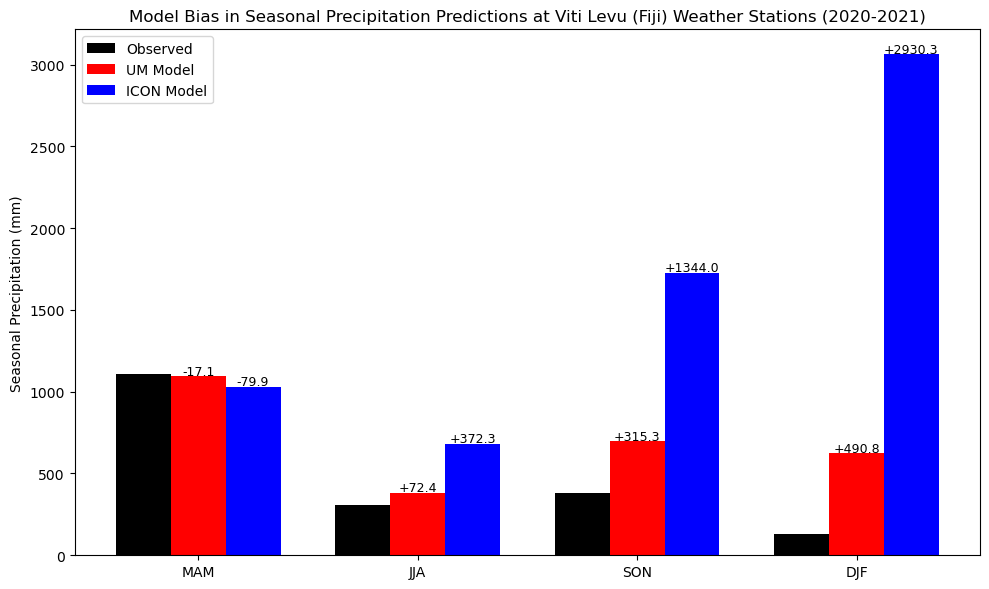

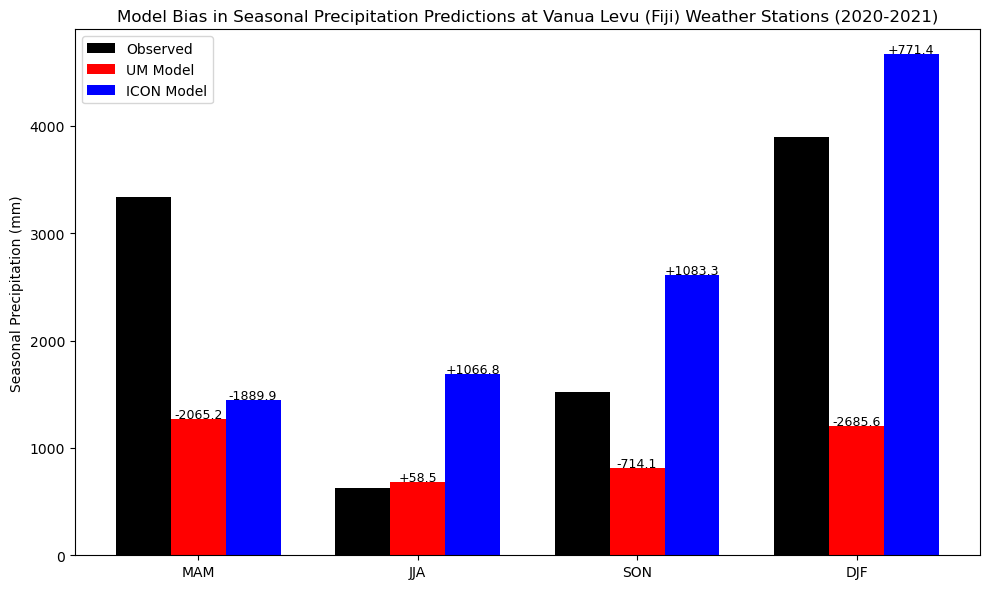

In [111]:
# Show seasonal bias
print(start_date)
print(finish_date)

obs_top = {
    'MAM': 0,
    'JJA': 0,
    'SON': 0,
    'DJF': 0
}
obs_bot = {
    'MAM': 0,
    'JJA': 0,
    'SON': 0,
    'DJF': 0
}
# UM model seasonal totals
um_top = {
    'MAM': 0,
    'JJA': 0,
    'SON': 0,
    'DJF': 0
}
um_bot = {
    'MAM': 0,
    'JJA': 0,
    'SON': 0,
    'DJF': 0
}

# ICON model seasonal totals
icon_top = {
    'MAM': 0,
    'JJA': 0,
    'SON': 0,
    'DJF': 0
}
icon_bot = {
    'MAM': 0,
    'JJA': 0,
    'SON': 0,
    'DJF': 0
}

obs_locations = ['labasa_airport', 'lautoka', 'penang', 'savusavu_airport', 'suva']
for i, obs_id in enumerate(obs_locations):
    # === Load observation ===
    obs_file = os.path.expanduser(f"{base_obs_path}/{obs_id}_daily.csv")
    obs_df = pd.read_csv(obs_file)
    date = pd.to_datetime(obs_df["date"])
    pr = obs_df["daily_rainfall_mm"]

    df = pd.DataFrame({
        'date':date,
        'pr':pr
    })
    df = df.set_index('date')
    monthly_sum = df.resample('ME').sum()

    # Get seasonal observation precip
    mam = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([3, 4, 5]))
    ]['pr'].sum()
    jja = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([6, 7, 8]))
    ]['pr'].sum()
    son = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([9, 10, 11]))
    ]['pr'].sum()
    djf = monthly_sum[
    (monthly_sum.index >= '2020-12-01') &
    (monthly_sum.index <= '2021-02-28')
    ]['pr'].sum()

    # Get UM seasonal precip
    model_file = os.path.expanduser(f"{base_model_path}/u_{locations[i]}_daily.csv")
    um_df = pd.read_csv(model_file)
    um_df = um_df.set_index('datetime')
    um_df.index = pd.to_datetime(um_df.index)
    monthly_sum = um_df['rain_24h_mm'].resample('M').sum()
    
    mam_um = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([3, 4, 5]))
    ].sum()
    jja_um = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([6, 7, 8]))
    ].sum()
    son_um = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([9, 10, 11]))
    ].sum()
    djf_um = monthly_sum[
    (monthly_sum.index >= '2020-12-01') &
    (monthly_sum.index <= '2021-02-28')
    ].sum()

    # Get ICON seasonal precip
    model_file = os.path.expanduser(f"{base_model_path}/g_{locations[i]}_daily.csv")
    um_df = pd.read_csv(model_file)
    um_df = um_df.set_index('datetime')
    um_df.index = pd.to_datetime(um_df.index)
    monthly_sum = um_df['rain_24h_mm'].resample('M').sum()
    
    mam_icon = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([3, 4, 5]))
    ].sum()
    jja_icon = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([6, 7, 8]))
    ].sum()
    son_icon = monthly_sum[
    (monthly_sum.index.year == 2020) & 
    (monthly_sum.index.month.isin([9, 10, 11]))
    ].sum()
    djf_icon = monthly_sum[
    (monthly_sum.index >= '2020-12-01') &
    (monthly_sum.index <= '2021-02-28')
    ].sum()
    
    # Plotting
    # Observed seasonal totals
    obs = {
        'MAM': mam,
        'JJA': jja,
        'SON': son,
        'DJF': djf
    }

    # UM model seasonal totals
    um = {
        'MAM': mam_um,
        'JJA': jja_um,
        'SON': son_um,
        'DJF': djf_um
    }

    # ICON model seasonal totals
    icon = {
        'MAM': mam_icon,
        'JJA': jja_icon,
        'SON': son_icon,
        'DJF': djf_icon
    }

    if (obs_id in ['labasa_airport', 'savusavu_airport']):
        obs_top = {k: obs_top[k] + obs[k] for k in obs}
        um_top = {k: um_top[k] + um[k] for k in um}
        icon_top = {k: icon_top[k] + icon[k] for k in icon}
    else:
        obs_bot = {k: obs_bot[k] + obs[k] for k in obs}
        um_bot = {k: um_bot[k] + um[k] for k in um}
        icon_bot = {k: icon_bot[k] + icon[k] for k in icon}


def plot(obs, um, icon, island):
    seasons = ['MAM', 'JJA', 'SON', 'DJF']
    x = np.arange(len(seasons))
    width = 0.25

    # Bar plot
    fig, ax = plt.subplots(figsize=(10, 6))

    bars_obs = ax.bar(x - width, [obs[s] for s in seasons], width, label='Observed', color='black')
    bars_um = ax.bar(x, [um[s] for s in seasons], width, label='UM Model', color='red')
    bars_icon = ax.bar(x + width, [icon[s] for s in seasons], width, label='ICON Model', color='blue')

    # Annotate bias above model bars
    for i, season in enumerate(seasons):
        bias_um = um[season] - obs[season]
        bias_icon = icon[season] - obs[season]
    
        ax.text(x[i], um[season] + 10, f'{bias_um:+.1f}', ha='center', color='black', fontsize=9)
        ax.text(x[i] + width, icon[season] + 10, f'{bias_icon:+.1f}', ha='center', color='black', fontsize=9)

    # Labels and formatting
    ax.set_xticks(x)
    ax.set_xticklabels(seasons)
    ax.set_ylabel('Seasonal Precipitation (mm)')
    ax.set_title(f'Model Bias in Seasonal Precipitation Predictions at {island} (Fiji) Weather Stations (2020-2021)')
    ax.legend()
    plt.tight_layout()
    fname = f"hk25-AusNode-ExtremePrecipitation/Plots/Fiji_{island}_seasonal_precip_barplot.png"
    plt.savefig(fname, dpi=150, bbox_inches='tight')
    plt.show()

plot(obs_top, um_top, icon_top, "Viti Levu")
plot(obs_bot, um_bot, icon_bot, "Vanua Levu")


In [ ]:
**Ignore code below

In [34]:
# IGNORE FROM BELOW HERE - IT IS NOT WORKING ##########################################################

# Prepare for making precipitation animation
pr_dtotal_F = time_sub_F.resample(time='1D').sum() #* 3600  # sum of hourly means × 3600s/hour
pr_dtotal_global = time_sub_global.resample(time='1D').sum()
frames = range(0,365)
print(len(pr_daily_total['time']))

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:find_group_cohorts: cohorts is preferred, chunking is perfect.
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=cohorts
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:find_group_cohorts: cohorts is preferred, chunking is perfect.
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=cohorts
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False


365


In [77]:
# Make an animation of the predicted precipitation in the area
for i in frames:
    pr_t = pr_dtotal_F.isel(time=i).compute()

    # Start a new figure with Cartopy projection
    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': projection})
    
    # Add basemap features
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    # Plot the scatter on top of the basemap
    sc = ax.scatter(
        lon_sub[mask], lat_sub[mask], c=pr_t[mask],
        cmap="viridis", s=2,
        transform=ccrs.PlateCarree()
    )

    # Add colorbar
    cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.7)
    cbar.set_label("mm/day")

    # Title and save
    ax.set_title(f"Precipitation on {str(pr_daily_total.time[i].values)[:19]}")
    fname = f"hk25-AusNode-ExtremePrecipitation/Plots/Fiji_gif_frames/frame_{i:04d}.png"
    plt.savefig(fname, dpi=150, bbox_inches='tight')
    plt.close()

In [78]:
# Create the animation
with imageio.get_writer("hk25-AusNode-ExtremePrecipitation/Plots/Fiji_precip_animation.gif", mode="I", duration=0.2) as writer:
    for i in frames:
        fname = f"hk25-AusNode-ExtremePrecipitation/Plots/Fiji_gif_frames/frame_{i:04d}.png"
        image = imageio.imread(fname)
        writer.append_data(image)

/jobfs/140878620.gadi-pbs/ipykernel_1032342/2383650209.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(fname)


In [31]:
# Subset the dataset for Fiji
ds_10_F = ds_10.sel(cell=subset_cells)
pr_10_F = ds_10_F.pr * 86400 # kg m-2 s-1 to mm / day, subsetted
pr_10 = ds_10.pr * 86400 # kg m-2 s-1 to mm / day, not subsetted
# The cropped precipitation data for Fiji is pr_10_F
print(pr_10_F)

<xarray.DataArray 'pr' (time: 10489, cell: 946)> Size: 79MB
dask.array<mul, shape=(10489, 946), dtype=float64, chunksize=(1, 946), chunktype=numpy.ndarray>
Coordinates:
  * cell     (cell) int64 8kB 8077283 8077284 8077285 ... 8249335 8249336
    crs      float64 8B ...
  * time     (time) datetime64[ns] 84kB 2020-01-20 ... 2021-04-01


In [79]:
# Get Healpix NSIDE
n_cells = len(ds_10['cell'])
nside = hp.npix2nside(n_cells)
print(n_cells, nside)

12582912 1024


In [80]:
# Get lat/lon of Healpix pixels
theta, phi = hp.pix2ang(nside, np.arange(n_cells))  # theta: colatitude, phi: longitude
lat_heal = np.degrees(0.5 * np.pi - theta)
lon_heal = np.degrees(phi)

In [82]:
def lonlat_to_vec(lon, lat):
    """Convert lon/lat in degrees to 3D unit vector."""
    theta = np.radians(90 - lat)
    phi = np.radians(lon)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return np.array([x, y, z])

# Corners of the bounding box
corners = [
    lonlat_to_vec(lon_min, lat_min),
    lonlat_to_vec(lon_min, lat_max),
    lonlat_to_vec(lon_max, lat_max),
    lonlat_to_vec(lon_max, lat_min),
]

# Convert to np.array for query_polygon
corners = np.array(corners)
